### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [37]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [281]:
data = pd.read_csv('data/coupons.csv')

In [283]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [286]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [288]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [70]:
missing_values = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

3. Decide what to do about your missing data -- drop, replace, other...

In [73]:
del data['car']

In [75]:
data['Bar'] = data['Bar'].fillna('never')
data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')
data['CarryAway'] = data['CarryAway'].fillna('missing')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')
data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')


4. What proportion of the total observations chose to accept the coupon? 



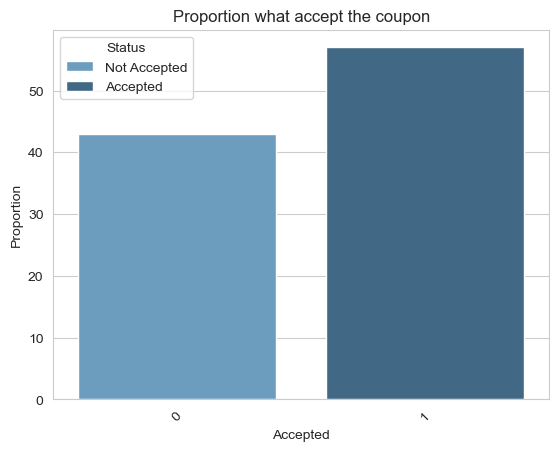

In [147]:
sns.set_style('whitegrid')
barplot = sns.barplot((data['Y'].value_counts(normalize=True) * 100).round(), palette='Blues_d', errorbar=None)
plt.title('Proportion what accept the coupon')
plt.xlabel('Accepted')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
barplot.legend(['Not Accepted', 'Accepted'], title='Status')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

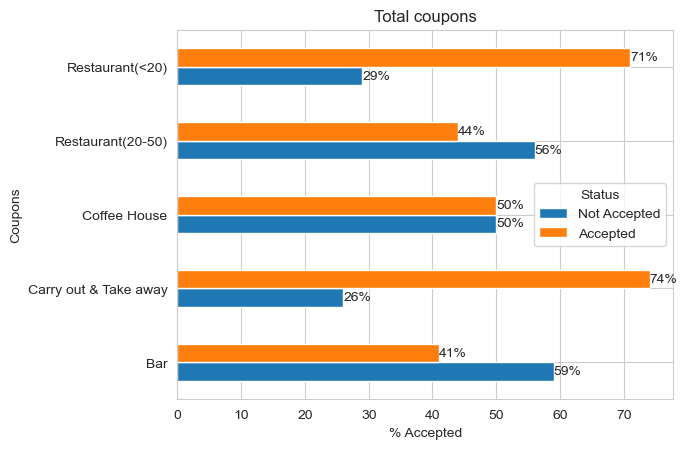

In [143]:
coupons_bar = (data.groupby('coupon')['Y'].value_counts(normalize=True) * 100).round().unstack().plot(kind='barh', stacked=False)
plt.title('Total coupons')
plt.ylabel('Coupons')
plt.xlabel('% Accepted')
# Actualizar la leyenda con nombres personalizados para los valores de Y
coupons_bar.legend(['Not Accepted', 'Accepted'], title='Status')

# Agregar etiquetas con los valores de porcentaje
for bars in coupons_bar.containers:
    coupons_bar.bar_label(bars, fmt='%.0f%%', label_type='edge')
plt.show()

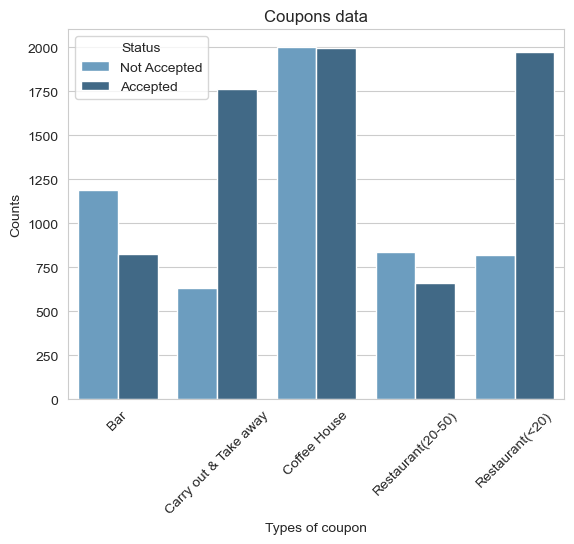

In [145]:
sns.set_style('whitegrid')
coupons = data.groupby(['coupon', 'Y']).size().reset_index(name='count')
barplot = sns.barplot(coupons, x='coupon', y='count', hue='Y', palette='Blues_d', errorbar=None)
plt.title('Coupons data')
plt.xlabel('Types of coupon')
plt.ylabel('Counts')
barplot.legend(['Not Accepted', 'Accepted'], title='Status')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

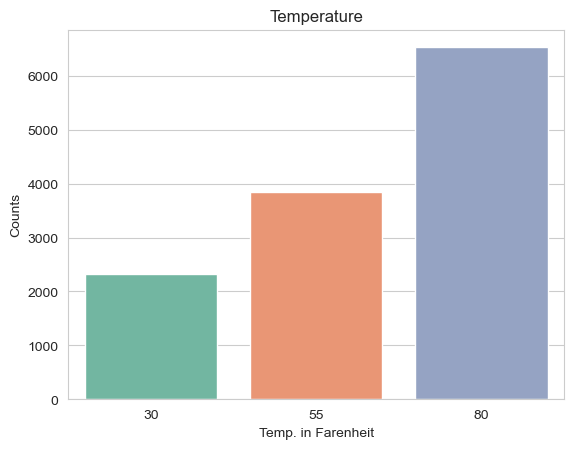

In [169]:
temperature = data.groupby('temperature').size().reset_index(name='counts')
temp_barplot = sns.barplot(temperature, x='temperature', y='counts', palette='Set2')
plt.title('Temperature')
plt.xlabel('Temp. in Farenheit')
plt.ylabel('Counts')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [171]:
bar = data[data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [175]:
(bar['Y'].value_counts(normalize=True) * 100).round()

Y
0    59.0
1    41.0
Name: proportion, dtype: float64

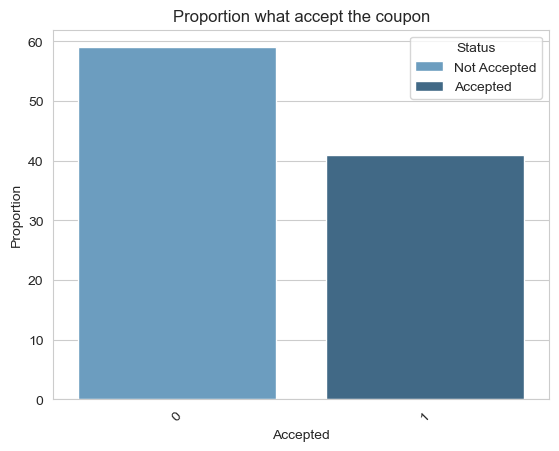

In [173]:
sns.set_style('whitegrid')
barplot = sns.barplot((bar['Y'].value_counts(normalize=True) * 100).round(), palette='Blues_d', errorbar=None)
plt.title('Proportion what accept the coupon')
plt.xlabel('Accepted')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
barplot.legend(['Not Accepted', 'Accepted'], title='Status')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [197]:
bar.loc[bar['Bar'].isin(['never', 'less1', '1~3']), 'Bar_Comp'] = 'less_3'
bar.loc[~bar['Bar'].isin(['never', 'less1', '1~3']), 'Bar_Comp'] = 'more_3'

In [199]:
bar['Bar_Comp'].value_counts()

Bar_Comp
less_3    1818
more_3     199
Name: count, dtype: int64

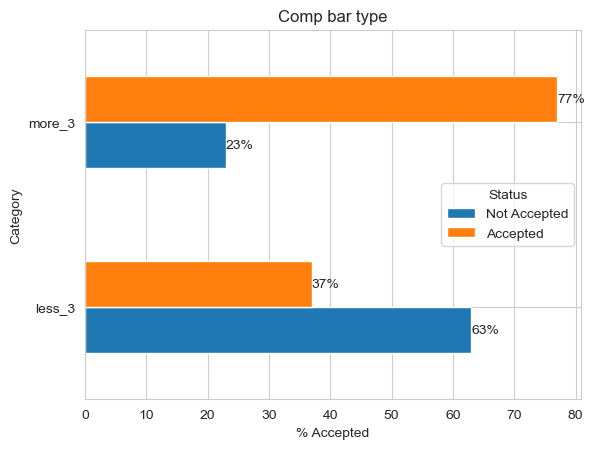

In [201]:
coupons_bar = (bar.groupby('Bar_Comp')['Y'].value_counts(normalize=True) * 100).round().unstack().plot(kind='barh', stacked=False)
plt.title('Comp bar type')
plt.ylabel('Category')
plt.xlabel('% Accepted')
# Actualizar la leyenda con nombres personalizados para los valores de Y
coupons_bar.legend(['Not Accepted', 'Accepted'], title='Status')

# Agregar etiquetas con los valores de porcentaje
for bars in coupons_bar.containers:
    coupons_bar.bar_label(bars, fmt='%.0f%%', label_type='edge')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [227]:
# Primero, manejamos los valores no numéricos y luego convertimos los numéricos a enteros
def age_transform(value):
    if value == '50plus':
        return 50  # Consideramos 50+ como 50
    elif value == 'below21':
        return 20  # Consideramos below21 como 20
    else:
        return int(value)  # Convertimos los valores numéricos a enteros

In [229]:
# Aplicamos la función a la columna 'age'
bar['age_numeric'] = bar['age'].apply(age_transform)


In [257]:
# Condición para 'more_1_and_25_years': bar en ['1~3', '4~8', 'gt8'] y edad numérica mayor a 25
bar.loc[(bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar['age_numeric'] > 25), 'Age_Comp'] = 'more_1_and_25_years'

# Condición para 'less_1_and_25_years': bar en ['never', 'less1'] y edad numérica menor a 25
bar.loc[(bar['Bar'].isin(['never', 'less1'])) & (bar['age_numeric'] < 25), 'Age_Comp'] = 'less_1_and_25_years'

In [259]:
bar['Age_Comp'].value_counts()

Age_Comp
less_1_and_25_years    1597
more_1_and_25_years     420
Name: count, dtype: int64

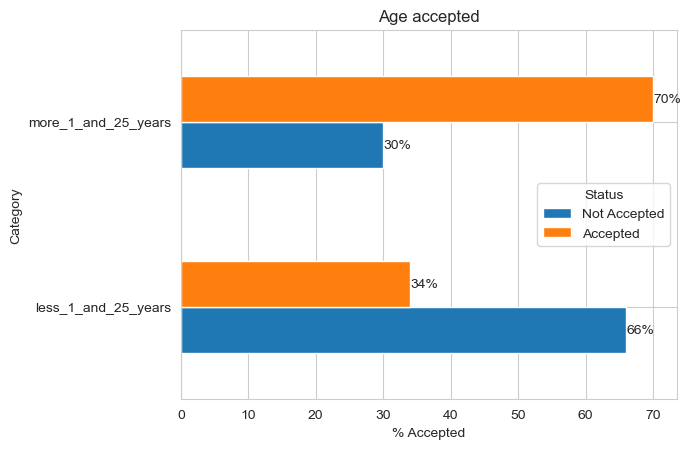

In [267]:
age_bar = (bar.groupby('Age_Comp')['Y'].value_counts(normalize=True) * 100).round().unstack().plot(kind='barh', stacked=False)
plt.title('Age accepted')
plt.ylabel('Category')
plt.xlabel('% Accepted')
# Actualizar la leyenda con nombres personalizados para los valores de Y
age_bar.legend(['Not Accepted', 'Accepted'], title='Status')

# Agregar etiquetas con los valores de porcentaje
for bars in age_bar.containers:
    age_bar.bar_label(bars, fmt='%.0f%%', label_type='edge')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [271]:
bar['car'].value_counts()

KeyError: 'car'

In [277]:
bar['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  